# Initial experiments: Raster, sequence pairs

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from dataset import QuickDrawDataset, SketchDataset
from raster_dataset import SketchImageDataset
from tokenizers import AbsolutePenPositionTokenizer
from tqdm import tqdm

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

seed = 42
torch.manual_seed(seed)
if device == "cuda":
    torch.cuda.manual_seed_all(seed)

Using device: cuda


In [ ]:
training_data = QuickDrawDataset(label_names=["cat"], download=True)
tokenizer = AbsolutePenPositionTokenizer(bins=64)
sketch_dataset = SketchDataset(training_data, tokenizer)
sketch_image_dataset = SketchImageDataset(sketch_dataset)

In [ ]:
training_data = QuickDrawDataset(label_names=["dog"], download=True)
tokenizer = AbsolutePenPositionTokenizer(bins=64)
sketch_dataset = SketchDataset(training_data, tokenizer)
sketch_image_dataset = SketchImageDataset(sketch_dataset)


Loading QuickDraw files: 1it [00:04,  4.29s/it]


Loaded tokenized data from sketch-im_tokenized_dataset-cat.pkl


Tokenizing SVGs: 100%|██████████| 143285/143285 [11:36<00:00, 205.78it/s]


Saved tokenized data to sketch-im_tokenized_dataset-dog.pkl


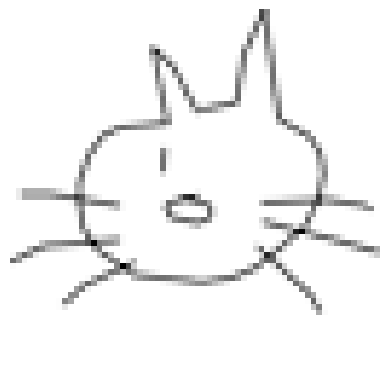

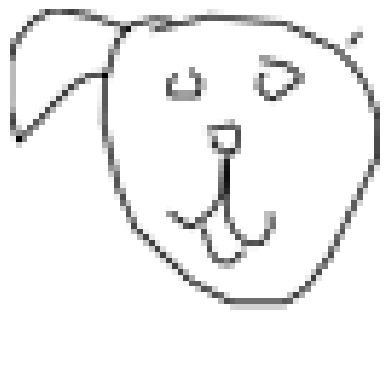

In [58]:
image, input_ids, target_ids = cat_dataset[0]

image = (image * 255).byte()

# show image
image = image.numpy()

import matplotlib.pyplot as plt

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

image, input_ids, target_ids = dog_dataset[0]

image = (image * 255).byte()

# show image
image = image.numpy()

import matplotlib.pyplot as plt

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [59]:
!git clone https://github.com/KhrulkovV/geometry-score.git
!cd geometry-score && pip install -e . && pip install gudhi

fatal: destination path 'geometry-score' already exists and is not an empty directory.


Obtaining file:///C:/Code/Generative-SVG/geometry-score
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for geometry-score (pyproject.toml): started
  Building editable for geometry-score (pyproject.toml): finished with status 'done'
  Created wheel for geometry-score: filename=geometry_score-0.0.0-0.editable-py3-none-any.whl size=2809 sha256=09bdad11e3637d0a3dc07a9b183f67ff058ebd90a4f377d3dab17c6f0e7f810c
  Stored in directory: C:\Users\matth\AppData\Local\Temp\pip-ephem-wheel-cache-6wdk558g\wheels\87\db\b6\2678cf93fb9ba5603e


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
from torch.utils.data import DataLoader


class SketchImageDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx][0]


cat_sketch_images = SketchImageDataset(cat_dataset)

loader = DataLoader(cat_sketch_images, shuffle=True, batch_size=1024)

loader2 = DataLoader(cat_sketch_images, shuffle=True, batch_size=1024)

dog_sketch_images = SketchImageDataset(dog_dataset)

loader3 = DataLoader(dog_sketch_images, shuffle=True, batch_size=1024)

it = iter(loader)
data = next(it)

print(data.shape)

# reshape it into 2d array
x_1 = data.view(data.size(0), -1)

print(x_1.shape)

x_1 = x_1.numpy()


it2 = iter(loader2)
data2 = next(it2)
x_2 = data2.view(data2.size(0), -1)
x_2 = x_2.numpy()

it3 = iter(loader3)
data3 = next(it3)
x_3 = data3.view(data3.size(0), -1)
x_3 = x_3.numpy()

torch.Size([1024, 64, 64])
torch.Size([1024, 4096])


In [61]:
import gs
import numpy as np

In [ ]:
rltx_1 = gs.rlts(x_1, gamma=1.0 / 128, n=100)
rltx_2 = gs.rlts(x_2, gamma=1.0 / 128, n=100)
rltx_3 = gs.rlts(x_3, gamma=1.0 / 128, n=100)

Done 0/100
Done 10/100
Done 20/100
Done 30/100
Done 40/100
Done 50/100
Done 60/100
Done 70/100
Done 80/100
Done 90/100
Done 0/100
Done 10/100
Done 20/100
Done 30/100
Done 40/100
Done 50/100
Done 60/100
Done 70/100
Done 80/100
Done 90/100
Done 0/100
Done 10/100
Done 20/100
Done 30/100
Done 40/100
Done 50/100
Done 60/100
Done 70/100
Done 80/100
Done 90/100


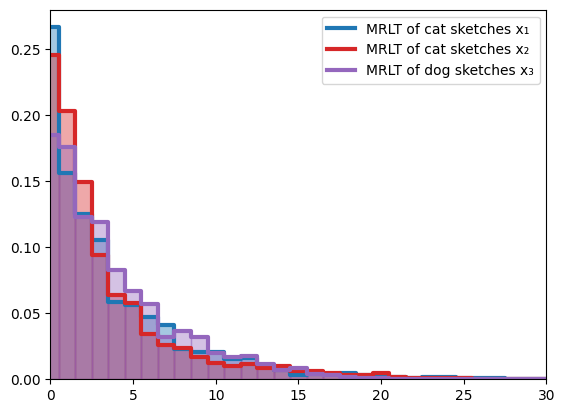

In [63]:
mrlt = np.mean(rltx_1, axis=0)
gs.fancy_plot(mrlt, color="C0", label="MRLT of cat sketches x₁", alpha=0.4)

mrlt2 = np.mean(rltx_2, axis=0)
gs.fancy_plot(mrlt2, color="C3", label="MRLT of cat sketches x₂", alpha=0.4)

mrlt3 = np.mean(rltx_3, axis=0)
gs.fancy_plot(mrlt3, color="C4", label="MRLT of dog sketches x₃", alpha=0.4)

plt.xlim([0, 30])
plt.legend()

In [65]:
gs.geom_score(rltx_1, rltx_2)

np.float64(0.004035555711683732)

In [66]:
gs.geom_score(rltx_1, rltx_3)

np.float64(0.008504794101875959)